## Library 
We need this two package  to handle Persian language
*   hazm
*   Parsivar

Other packages are used for training or data mining

In [ ]:
!pip install hazm
!pip install parsivar

In [ ]:
import pandas as pd
import hazm
import numpy as np
import matplotlib.pyplot as plt
from parsivar import FindStems
from parsivar import Normalizer
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from tensorflow.keras import utils
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('train_set.csv')
persian_stop_words = np.loadtxt('stopwords.dat', dtype=str, delimiter='\n')

# Label distribution: 
As you can see the distribtion in labels is pretty even and only class 5 needs to be fixed

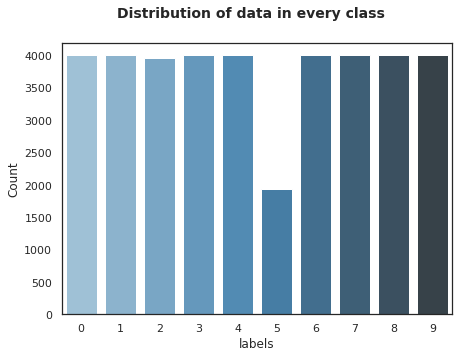

In [ ]:
def show_distrb(df):
  #Distribution of data in every class
  sns.set(style="white")
  #counting labels
  L_counter=df['label'].value_counts()
  Label_count=pd.DataFrame({ 'Count':L_counter.values, 'labels':L_counter.index})
  #ploting the distribution
  fig=plt.figure(figsize=(7,5))
  fig.suptitle('Distribution of data in every class', fontsize=14, fontweight='bold')
  sns.barplot(y="Count", x="labels", data=Label_count,palette="Blues_d")
show_distrb(df)

In [ ]:
my_normalizer = Normalizer(statistical_space_correction=True)
my_stemmer = FindStems()

In [ ]:
def Sent_cleaner(Raw_description):
  #Deleting unwanted characters

  Raw_description=my_normalizer.normalize(Raw_description)
  Raw_description=Raw_description.translate({ord(i): " " for i in '&__✍🔮😲 🐶👓🤖👺👧🧑🔊👼🔊●✒🤩🖼🔝📄📷🎨🌈🔁♒ ★🇮🇷 ;👰🏻🔁💡〽️👱🏻\u200d♀️\u200c🏆\r\xa0➊✔оа②оаоаבבבـבבـבـᓄ½⅔šćβχυμείαаяввестивводитьвеоаоеоятностныйсскийтоҷикӣыеязыўзбекчаհայերեն𝐁𝐨𝐥𝐝𝓗𝓪𝓷𝓭𝓦𝓻𝓲𝓽𝓲𝓷𝓰руv_/<><br>*&^%$#@!.:()-0123456789ABCDEFGHIJKLMNOPQRSTVUWXYZabcdefghijklmnopqrstuvwxyz1234567890,،٬?؟۰۱۲۳۴۵۶۷۸۹'})
  #Raw_description=Raw_description.translate({ord(i): i for i in 'آابپتثجچحخدذرزژسشصضطظعغفقکگمنوهی'if i not in " " }) 
  words=hazm.word_tokenize(Raw_description)
  meaningful_words=""
  #Making the clean sentence with stemed version of every important word 
  for w in words:
    if w not in persian_stop_words:
            w = my_stemmer.convert_to_stem(w)
            meaningful_words = meaningful_words+" "+w
  #Deleting unwanted characters
  meaningful_words=meaningful_words.translate({ord(i): " " for i in '&_'})
  return meaningful_words

In [ ]:
def preprocess(dataframe):
    clean_description_fa = []

    #Cleaning every description from stop words or unwanted characters
    for i in range(0,len(dataframe)):  
      clean_description_fa.append(Sent_cleaner(dataframe.iloc[i]['description_fa']))

    dataframe['description_fa']=clean_description_fa
    return dataframe

df=preprocess(df)

In [15]:
df

,app_id,description_fa,label
0,0,بازی مین برنامه فکری مین موجود صفحه بازی کشف ...,1
1,1,دراین بازی عکس خاطر سپرده جواب پرسش متداول نا...,1
2,2,تلاش نافرجام درک بوف مرگ پایان ماجرا آنجاست ط...,7
3,3,فیلم نما برنامه دانلود پخش آنلاین فیلم سریال ...,7
4,4,برنامه حاوی عکس ژست مدل عکاسی شدنه کتاب مدل ع...,7
...,...,...,...
37894,37894,هزینه هفته مسابقه هرگونه ابهام سوال مشکل کانا...,1
37895,37895,حیوانات مزرعه کمک احتیاج بلوک نجات برد بر جذا...,1
37896,37896,دوست عکس پروفایلت خاص باشه برنامه نصب عالمه ع...,7
37897,37897,نسخه بازی بازی معما لوگو باشگاه جهان بینید حد...,1


# Frequent words
We can see what words are most repeated in the same class for example for class 0 these words are the top reported words.
* برنامه
* کتاب 
* امکان
* رمان
* داستان

This shows that the first class is for book-related applications

In [16]:
def freq_words(x, flagShow, terms = 30): 
  df_total=[]
  Frequent_words=[]
  for i in range(0,10):
    df_total.append(df['description_fa'][df.label==i])
  for i in range(0,10):
    all_words = ' '.join([text for text in df_total[i]]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
    
    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms)
    if flagShow:
        fig=plt.figure(figsize=(6,7)) 
        fig.suptitle('Top {} most frequent words in class {}'.format(terms,i), fontsize=14, fontweight='bold')
        ax = sns.barplot(data=d, x= "count", y = "word") 
        ax.set(ylabel = 'Word')
        plt.show()
    Frequent_words=Frequent_words +d['word'].tolist()
  return Frequent_words

In [17]:
def Frequent_words_only(Raw_description):
  FW=""
  words=hazm.word_tokenize(Raw_description)
  #Deleting words that are not frequent
  for w in words:
    if w in Frequent_words:
      FW=FW+" " +w
  return FW

In [18]:
def Clean_non_frequ(dataframe):
  clean_description_fa = []
  
  for i in range(0,len(dataframe)):  
    clean_description_fa.append(Frequent_words_only(dataframe.iloc[i]['description_fa']))

  dataframe['description_fa']=clean_description_fa
  return dataframe

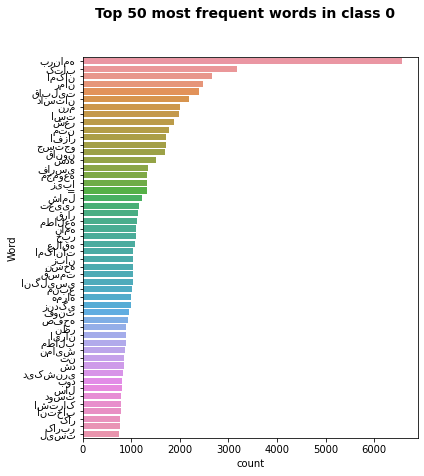

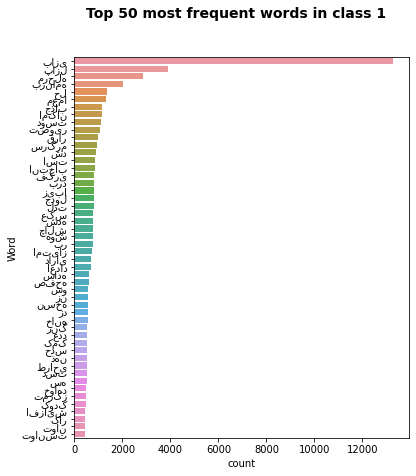

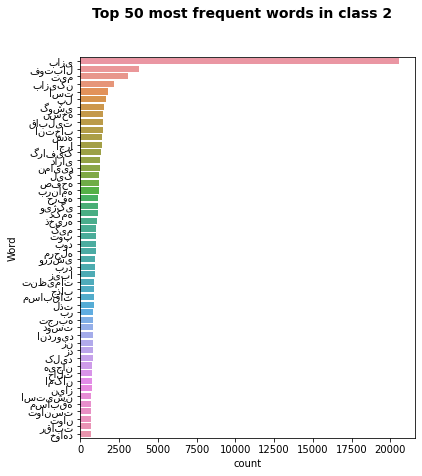

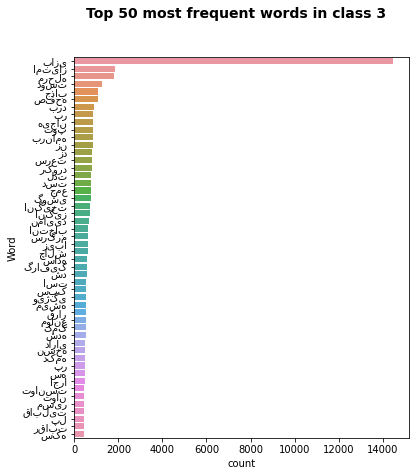

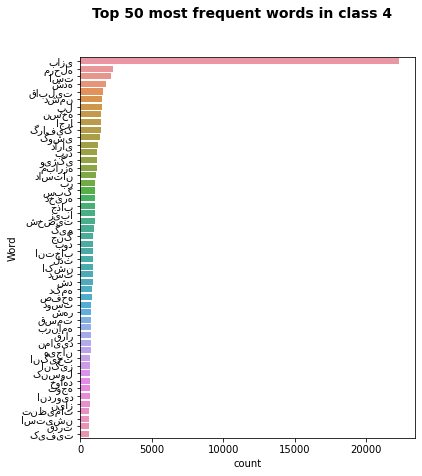

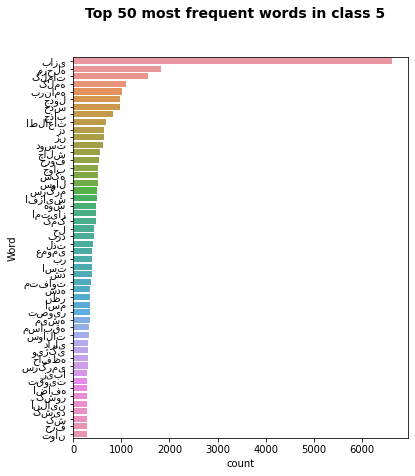

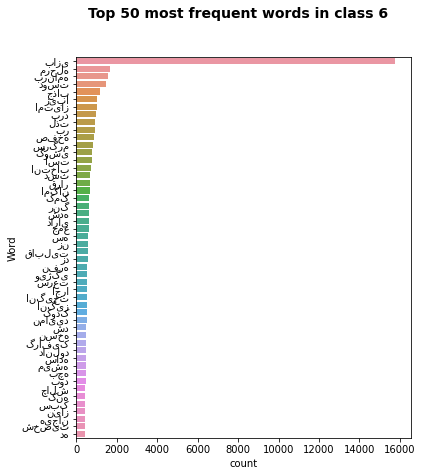

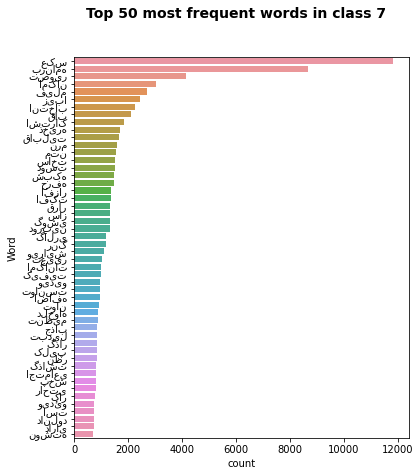

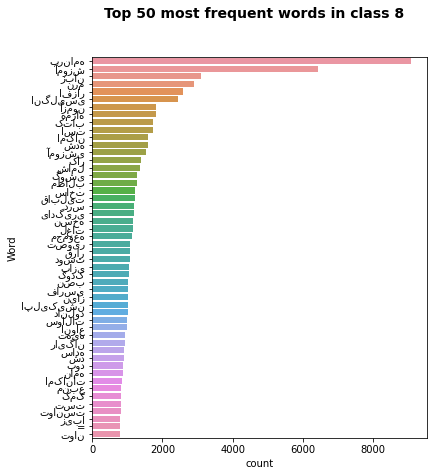

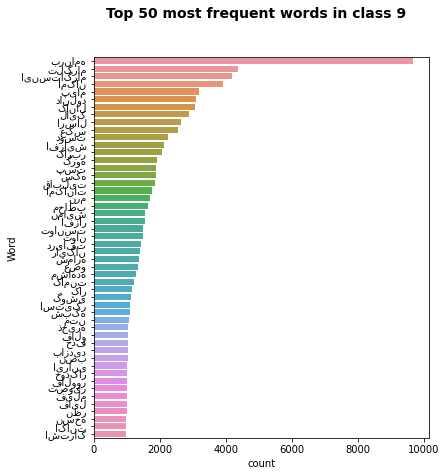

In [19]:
#show n most frequent words
Frequent_words= freq_words(df,True,50 )
#We can use only these words to train a model
df_train=Clean_non_frequ(df.copy())



# Training


In [ ]:
max_words=10000
xtrain, xval, ytrain, yval = train_test_split(df['description_fa'], df['label'], test_size=0.2, random_state=9)
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(xtrain) # only fit on train
x_train = tokenize.texts_to_matrix(xtrain)
x_test = tokenize.texts_to_matrix(xval)
encoder = LabelEncoder()
encoder.fit(ytrain)
y_train = encoder.transform(ytrain)
y_test = encoder.transform(yval)

nb =MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print('accuracy for MultinomialNB %s' % accuracy_score(y_pred, y_test))

sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, tol=None)
sgd.fit(x_train, ytrain)
y_pred = sgd.predict(x_test)
print('accuracy for SGDClassifier %s' % accuracy_score(y_pred, y_test))

logreg = LogisticRegression(n_jobs=1, C=1e5,class_weight='balanced')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('accuracy for LogisticRegression %s' % accuracy_score(y_pred, y_test))

## Neural network


In [ ]:
def nn(df,epochs=2,val_size=0.1):
  max_words = 10000
  xtrain=df['description_fa']
  ytrain=df['label']
  tokenize = text.Tokenizer(num_words=max_words, char_level=False)
  tokenize.fit_on_texts(xtrain) # only fit on train

  x_train = tokenize.texts_to_matrix(xtrain)

  encoder = LabelEncoder()
  encoder.fit(ytrain)
  y_train = encoder.transform(ytrain)

  num_classes = 10
  y_train = utils.to_categorical(y_train, num_classes)

  batch_size = 32
  filepath='weights0.{epoch:02d}-{val_loss:.2f}.hdf5'
  CB=keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

  # Build the model
  model = Sequential()
  model.add(Dense(512, input_shape=(max_words,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
                
  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,validation_split=val_size,callbacks=[CB])
  return model

In [ ]:
model=nn(df,2,0.1)

Epoch 1/2
1066/1066 [==============================] - 48s 32ms/step - loss: 1.1448 - accuracy: 0.6275 - val_loss: 0.7655 - val_accuracy: 0.7298
Epoch 2/2
1066/1066 [==============================] - 33s 31ms/step - loss: 0.5319 - accuracy: 0.8195 - val_loss: 0.8021 - val_accuracy: 0.7277


## Voting Classifier
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. 

I used:
* LogisticRegression
* ExtraTreesClassifier
* Multinomial Naive Bayes classifier
* Stochastic Gradient Descent (SGD)



In [ ]:
def Ensmble_Train(df):
  xtrain=df['description_fa']
  ytrain=df['label']
  max_words=10000
  tokenize = text.Tokenizer(num_words=max_words, char_level=False)
  tokenize.fit_on_texts(xtrain) # only fit on train
  x_train = tokenize.texts_to_matrix(xtrain)
  encoder = LabelEncoder()
  encoder.fit(ytrain)
  y_train = encoder.transform(ytrain)
  nb = MultinomialNB()
  sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
  lr=LogisticRegression(n_jobs=1, C=1e5)
  #forestclf = ExtraTreesClassifier(n_estimators=100)
  #EModels = [('lr',lr),('svm',sgd),('nb',nb),('forest',forestclf)]
  EModels = [('svm',sgd),('nb',nb),('lr',lr)]
  ensemble = VotingClassifier(estimators=EModels, voting='hard')
  ensemble.fit(x_train, y_train)
  return ensemble

In [ ]:
ensemble=Ensmble_Train(df)

# Test Data
First we clean the test data too, then we use one of the models (In this case NN had a better accuracy) to predict the labels and finally we save it in the predication.csv

In [ ]:
def Predict_test(dfTest,ModelNumber=0)
  dfTest = pd.read_csv('test_set.csv')

  #Cleaning the test dataset
  dfTest=preprocess(dfTest)
  tokenize = text.Tokenizer(num_words=10000, char_level=False)
  tokenize.fit_on_texts(dfTest['description_fa']) # only fit on trai
  x_test = tokenize.texts_to_matrix(dfTest['description_fa'])

  #Making the prediction dataframe
  words_df = pd.DataFrame({'app_id':[], 'label':[]}) 
  words_df['app_id']=dfTest['app_id']

  if (ModelNumber==0):
    score=model.predict(x_test)
    #For the neural network, the index of maximum element is the label
    words_df['label']=np.argmax(score,axis=1)

  else:
    score=ensmble.predict(x_test)
    words_df['label']=score

  #saving prediction.csv
  words_df.to_csv("prediction.csv", index=False)
  return words_df

In [ ]:
dfTest = pd.read_csv('test_set.csv')
Predict_test(dfTest,0)